# The usage of Sherman-Morrison formula

## Sherman-Morrison formula

$$
(A+xy^t)^{-1} = A^{-1} - \frac{A^{-1} xy^t A^{-1}}{1 + y^t A^{-1} x},
$$
where $x$ and $y$ are vectors.


## Solving a system of linear equations with rank one perturbation

To solve the system $(A+xy^t)X=b$, we simply apply the formula to have
$$
X = (A+xy^t)^{-1}b = A^{-1}b - \frac{A^{-1} xy^t A^{-1}b}{1 + y^t A^{-1} x}.
$$

The implementation requires two steps: 
1. At first we define two vectors $u$ and $v$ as
  $$
  u=A^{-1}b, \quad v=A^{-1}x.
  $$
  So that the formula can be rewritten as
  $$
  X= u - \frac{vy^t u}{1 + y^t v}.
  $$
  * In practice, the algorithm is performed by solving
    $$
    A[u, v]=[b, x].
    $$
2. The second step require performing the vector multiplication in a correct order
  $$
  X= u - \frac{v(y^t u)}{1 + y^t v}.
  $$

To summarize, the operation count for Sherman Morrison formula is about the same as for solving the linear system. 

### Test 1:
To test the time requiring for different implementation, at first we check the vector-vector multiplication time. 

Let's choose three vectors $u$, $v$ and $y$ and perform the following two operations:
1. $v(y^tu)$
2. $(vy^t)u$

In [ ]:
import numpy as np
import time

In [ ]:
n = 10000

# Construct u, v, y^t
u = np.random.rand(n, 1)
v = np.random.rand(n, 1)
yT = np.random.rand(1, n)

In [ ]:
# version1
start1 = time.time()
ver1 = v.dot(yT.dot(u))
end1 = time.time()
# version2
start2 = time.time()
ver2 = (v.dot(yT)).dot(u)
end2 = time.time()

print('version1 time: ', end1-start1)
print('version2 time: ', end2-start2)
print('difference between the results in 2-norm = ', np.linalg.norm(ver1 - ver2))

version1 time:  0.0008971691131591797
version2 time:  0.3935999870300293
difference between the results in 2-norm =  3.682117994957457e-07


### Test 2:
Here we test the time for solving two systems using two different approaches:
1. Solve two systems 
  $$
  Au=b, \quad Av=x.
  $$
2. Solve both system in the same time
  $$
  A[u, v]=[b, x].
  $$

In [ ]:
# Construct a n-by-n matrix A
n = 3000
A = np.random.random((n,n))
bx = np.random.random((n,2))
b = bx[:,0:1]
x = bx[:,1:2]

In [ ]:
start0 = time.time()
u = np.linalg.solve(A, b)
end0 = time.time()
print('To solve one matrix requires time (s): ', end0-start0)

# version1
start1 = time.time()
u = np.linalg.solve(A, b)
v = np.linalg.solve(A, x)
end1 = time.time()
print('To solve two matrices requires time (s): ', end1-start1)

# version2
start2 = time.time()
uv = np.linalg.solve(A, bx)
end2 = time.time()
print('To solve two matrices together requires time (s): ', end2-start2)

To solve one matrix requires time (s):  0.6716499328613281
To solve two matrices requires time (s):  1.3996481895446777
To solve two matrices together requires time (s):  0.7133643627166748


### Test 3:
Here we consider solving sparse linear systems with rank-1 perturbation

In [ ]:
import matplotlib.pylab as plt
import scipy.sparse
import scipy.sparse.linalg

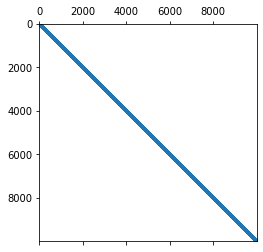

In [ ]:
# Construct a n-by-n tridiagonal sparse matrix S
n=10000
ss = np.random.rand(3, n)
S = scipy.sparse.spdiags(ss,(-1, 0, 1), n, n, format='csr')
plt.spy(S, markersize=1)

bx = np.random.random((n,2))
b = bx[:,0:1]
x = bx[:,1:2]
yT = np.random.random((1,n))

In [ ]:
# Estimate the time requires for solving a tridiagonal system
start1 = time.time()
x_test = scipy.sparse.linalg.spsolve(S, b)
end1 = time.time()

print('To solve a sparse matrix using `scipy.sparse.linalg.spsolve` requires time (s): ', end1-start1)

To solve a sparse matrix using `scipy.sparse.linalg.spsolve` requires time (s):  0.02856898307800293


In [ ]:
# Construct the rank-1 perturbed matrix S2
S2 = S + x*yT

# Believe me or not, the system is dense, but it takes time to plot. 
# Uncomment the following lines to give it a try
#
#plt.spy(S2, markersize=1)

In [ ]:
# Estimate the time to solve directly the rank-1 perturbed system
start0 = time.time()
xe2 = np.linalg.solve(S2, b)
end0 = time.time()
print('To solve a dense matrix using `np.linalg.solve` requires time (s): ', end0-start0)

# It takes much more time to use `scipy.sparse.linalg.spsolve` to solve a dense system
# Uncomment the following lines to give it a try
#
#start1 = time.time()
#x = scipy.sparse.linalg.spsolve(S2, b)
#end1 = time.time()
#print('To solve a dense matrix using `scipy.sparse.linalg.spsolve` requires time (s): ', end1-start1)

To solve a dense matrix using `np.linalg.solve` requires time (s):  25.457918643951416


In [ ]:
# Estimate the time for Sherman-Morrison formula
start1 = time.time()
uv = scipy.sparse.linalg.spsolve(S, bx)
u = uv[:,0:1]
v = uv[:,1:2]
xe = u - v.dot(yT.dot(u))/(1+yT.dot(v))
end1 = time.time()
print('To time requires for Sherman-Mossison formula (s): ', end1-start1)

To time requires for Sherman-Mossison formula (s):  0.011904478073120117


In [ ]:
print('difference between the results in 2-norm = ', np.linalg.norm(xe - xe2))

difference between the results in 2-norm =  1.9758205667163338e-07
